<a href="https://colab.research.google.com/github/UIT-19521183/CS114.L21/blob/main/final_project/final_project_ML_bookcase_digitization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC</b></h1>
<h1 align="center"><b>ĐỒ ÁN CUỐI KÌ</b></h1>
<h1 align="center"><b>Đề tài: SỐ HÓA TỦ SÁCH TIẾNG VIỆT (bookcase digitization)</b></h1>

##**1.Giới thiệu**
* **Bộ môn:** Máy học - CS112.L21
* **Giảng viên:**
  * Lê Đình Duy
  * Phạm Nguyễn Trường An
* **Thành viên nhóm:**
  * Huỳnh Đỗ Tấn Thành - 19522227 (Leader)
  * Nguyễn Lâm Thảo Vy - 19522547
  * Nguyễn Thị Thúy An - 19521183


## **2.Mô tả bài toán**
* **Bối cảnh ứng dụng:** Trong thời đại số hóa, việc đọc hình ảnh chuyển thành dữ liệu có thể xử lý thao tác được trên máy tính không còn xa lạ nữa. Ví dụ như đọc ảnh chưng minh nhân dân chẳng hạn, hay là giấy khai sinh, ... Nhóm chúng em thực hiện đồ án số hóa tủ sách này với mong muốn có thể giải quyết được việc thay vì thao tác nhập tay để lưu thông tin của quyển sách ta có thể đọc từ ảnh chụp.
* **Ưu điểm:** Giúp giảm thao tác nhập liệu khi có một kho thư viện khá lớn (vài ngàn cuốn sách) khi muốn lưu thông tin sách lên máy.
* **Nhược điểm:** Việc số hóa được một cuốn sách cũng khá là phức tạp. Độ chính xác bị giảm dần qua nhiều thao tác. Có nhìu cuốn sách không thể đọc được như chữ bị khuyết, bị che, chứ lồng vào nhau khá nhiều, chữ xiêng nhiều, chữ chìm, chữ đan xen nhau,... Nên việc số hóa chỉ nên đối với các sách đơn giản hơn.

* **INPUT:** Ảnh chụp bìa sách từ camera với chất lượng ảnh tối thiểu là Full HD (720x960).
* **OUTPUT:** File CSV chứa thông tin của sách gồm 7 trường dữ liệu:
  * tên file
  * Tên sách
  * Tên tác giả
  * Nhà xuất bản
  * Tập
  * Người dịch
  * Tái bản

* **Pipeline:**
<a align = center>
  <img src='https://drive.google.com/uc?export=view&id=1vh6oQbLgfoV850cQYrZt_IzT4tpm4XIA' align = center>
  <div style=width: 130px; align = center>Pipeline bookcase digitization</div>

## **3.Mô tả dữ liệu:**
### **3.1 Thu thập dữ liệu:**
  * 500 ảnh bìa sách được chụp dưới nền đen.
  * 10000 ảnh bìa sách được crawl từ nhiều nguồn khác nhau như:
    * [Nhà xuất bản Trẻ](https://www.nxbtre.com.vn/)
    * [Nhà xuất bản Kim Đồng](https://nxbkimdong.com.vn/)
    * [Nhà xuất bản ĐHQG-TPHCM](https://vnuhcmpress.edu.vn/)
    * [Nhà xuất bản Hà Nội](http://www.nxbhanoi.com.vn/)
    * [Nhà xuất bản Đà Nẵng](https://nxbdanang.vn/)
    * [Nhà xuất bản Quân đội nhân dân](http://nxbqdnd.com.vn/)
    * [Nhà xuất bản khoa học xã hội](http://nxbkhxh.vass.gov.vn/)
    * [Nhà xuất bản thanh niên](https://www.nhaxuatbanthanhnien.vn/)
    * [Nhà xuất bản tư pháp](https://nxbtuphap.moj.gov.vn/)
    * [Nhà sách tiki](tiki.vn/sach-truyen-tieng-viet/c316?page=1&src=c.8322.hamburger_menu_fly_out_banner)
  * 45000 dòng text được cắt ra từ chính những sách đã thu thập được.
  * 100000 dòng text được generate từ nhiều font chữ khác nhau.

### **3.2 Dán nhãn dữ liệu**
  * Vì thời gian thực hiện đồ án có hạn nên nhóm em đã dán nhãn được:
    * 6000 ảnh bìa sách phục vụ train model YOLO ([link dán nhãn](http://makesense.ai/))
    * 45000 dòng text để phục vụ train model VietOCR ([link dán nhãn](https://www.robots.ox.ac.uk/~vgg/software/via/via.html))

### **3.3 Thao tác xử lý dữ liệu:**
  * Đầu tiên với ảnh thô chụp từ camera dưới nền đen ta dễ dàng contour ảnh từ một số bước xử lý dữ liệu:
    * Resize ảnh.
    * Convert ảnh thành Gray Scale.
    * Sử dụng Gaussian Blur và Candy Blur.
    * [Find contour](https://pythonexamples.org/python-opencv-cv2-find-contours-in-image/).
    * Lấy ra contour lớn nhất.
    * Lấy ra bốn điểm của countour và cắt ảnh bằng [cv2.warpPerspective](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)

  * Tiếp theo đến việc detect object, nhóm em sử dụng model deeplearning của [YOLOv5](https://github.com/ultralytics/yolov5)
      * Với 6 label:
        * 0: Tên sách
        * 1: Tên tác giả
        * 2: Nhà xuất bản
        * 3: Tập
        * 4: Người dịch
        * 5: Tái bản
      * Cắt ảnh ra từ những object đã được predict của phần object detection ở trên.
  * Craft:
    * Nhóm em sử dụng model deeplearning đã được train sẵn từ nhiều ngôn ngữ khác nhau: [Craft text detector](https://github.com/clovaai/CRAFT-pytorch) với:
      * text_threshold=0.7
      * link_threshold=0.4
      * low_text=0.3
      * long_size=1280
  * OCR:
    * Chuyển ảnh thành Gray Scale.
    * Nhóm em sử dụng model [VietOCR](https://github.com/pbcquoc/vietocr).
    * Sử dụng xoay ảnh để có thể đọc được cả chữ dọc.
    * Xử lý xóa các text không liên quan trong tên sách do các object khác nhau bị chồng lên nhau, ví dụ như trong việc tên sách có cả tên tác giả nếu như trong object tên sách có cả tên tác giả thì ta sẽ xóa tên tác giả có trong tên sách.
  * Lưu kết quả:
    * Thêm vào dataframe và lưu dưới dạng file csv.

### **3.4 Phân chia (split) - train/dev/test**
 * Với model YOLOv5 
    * Training data (85%): 5951 labels (tỉ lệ train/val là 8/2)​
        * Tập train: 4745 labels​
        * Tập val: 1206 labels​
    * Testing data (15%): 1031 labels
 * Với model VietOCR thì nhóm em để chia train/val theo tỉ lệ 80/20.
 * Đối với việc đánh giá thì em dành những ảnh chụp thực tế chưa dán nhãn cả phần VietOCR và YOLO chia làm 3 phần: easy(106), medium(147), hard(71)

# Import data

In [1]:
!git clone https://github.com/HuynhDoTanThanh/bookcase-digitization.git

Cloning into 'bookcase-digitization'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 285 (delta 3), reused 0 (delta 0), pack-reused 277
Receiving objects: 100% (285/285), 440.37 MiB | 40.78 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [2]:
%cd /content/bookcase-digitization
! gdown https://drive.google.com/uc?id=10PfEFMMT4W8TUd1giXnf6HzhmRSwl6S_

/content/bookcase-digitization
Downloading...
From: https://drive.google.com/uc?id=10PfEFMMT4W8TUd1giXnf6HzhmRSwl6S_
To: /content/bookcase-digitization/last.pt
283MB [00:03, 78.7MB/s]


In [3]:
%cd /content/bookcase-digitization
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


In [4]:
!pip install craft_text_detector
!pip install --quiet vietocr==0.3.5

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-py3-none-any.whl size=9045 sha256=432c955d1fcf944eabb893959369895f29cb06665bdcf84e92dbca7f52eaef1b
  Stored in directory: /root/.cache/pip/wheels/2f/2a/2f/86449b6bdbaa9aef873f68332b68be6bfbc386b9219f47157d
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
     |████████████████████████████████| 61 kB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 280 kB 23.8 MB/s 
     |████████████████████████████████| 948 kB 69.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

#Demo with 10 samples

In [5]:
%cd /content/bookcase-digitization
# Cú pháp: !python main.py -i <thư mục chứa ảnh>
!python main.py -i /content/bookcase-digitization/data_test

/content/bookcase-digitization
YOLOv5 🚀 v5.0-370-gdbc06ce torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 606 layers, 141044212 parameters, 0 gradients, 221.3 GFLOPs
Adding AutoShape... 
Craft text refiner weight will be downloaded to /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
100% 1.85M/1.85M [00:00<00:00, 8.11MB/s]
Craft text detector weight will be downloaded to /root/.craft_text_detector/weights/craft_mlt_25k.pth
Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: /root/.craft_text_detector/weights/craft_mlt_25k.pth
83.2MB [00:02, 35.7MB/s]
Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1uvPvRYjcr43JErWXizLY2EglbHh55Pdz
Downloading...
From: https://drive.google.com/uc?id=1uvPvRYjcr43J

In [6]:
import pandas as pd

data_easy_pre = pd.read_csv('/content/bookcase-digitization/data.csv')
data_easy_pre.head(10)

,Unnamed: 0,file names,tên sách,tên tác giả,nhà xuất bản,tập,người dịch,tái bản
0,3,1624445642850.jpg,Tuyển chọn 171 bài văn hay BỒI DƯỠNG HỌC SINH ...,LÊ THỊ MỸ TRINH NGUYỄN THỊ HƯƠNG TRẦM,NHÀ XUẤT BẢN TỔNG HỢP THÀNH PHỐ HỒ CHÍ MINH,NaN,NaN,NaN
1,1,1624598848338.jpg,DORAEMON Chú mèo máy đến từ Tương lai,Fujiko-F-Fujio,KIM ĐỒNG,10,NaN,NaN
2,5,1627830295117.jpg,"Hỏi đáp về phong tục, tập quán Việt Nam",NaN,NHÀ XUẤT BẢN QUÂN ĐỘI NHÂN DÂN,NaN,NaN,NaN
3,2,1627830295130.jpg,TÔN TỬ VẬN DUNG MƯU MẸO TỒN TỬ TRONG CUỘC SỐNG,HÙNG TRUNG VŨ,NaN,NaN,NaN,NaN
4,4,1628332196373.jpg,PAPILLON NGƯỜI TÙ KHỔ SAI,Henri Charriere,NaN,NaN,NaN,NaN
5,6,1628332196468.jpg,Tranz và Clara,PHILIPPE LABRO,NHÀ XUẤT BẢN PHỤ NỮ,NaN,NaN,NaN
6,0,1628332196570.jpg,Món ăn chế biến ca,NGUYỄN TRÚC CHI,NHÀ XUẤT BẢN TỔNG HỢP TP.HỒ CHÍ MINH,NaN,NaN,NaN
7,9,IMG_3559.JPG,Seraph of the end Thiên thần diệt thế,Nguyên tác: Takaya Kagami Minh họa: Yamato Yam...,NHÀ XUẤT BẢN KIM ĐỒNG,8,Dịch gi: Ukatomai,NaN
8,7,IMG_3589.JPG,NARUTO,MASASHI KISHIMOTO,NHÀ XUẤT BẢN HẢI PHÒNG,TẬP 3,NaN,NaN
9,8,IMG_3605.JPG,LÃNH QUỦ HOZUKI,NATSUMI EGUCHI,NHÀ XUẤT BẢN TRẺ,NHẤT,Hi Tenjou Dịch giả:,NaN


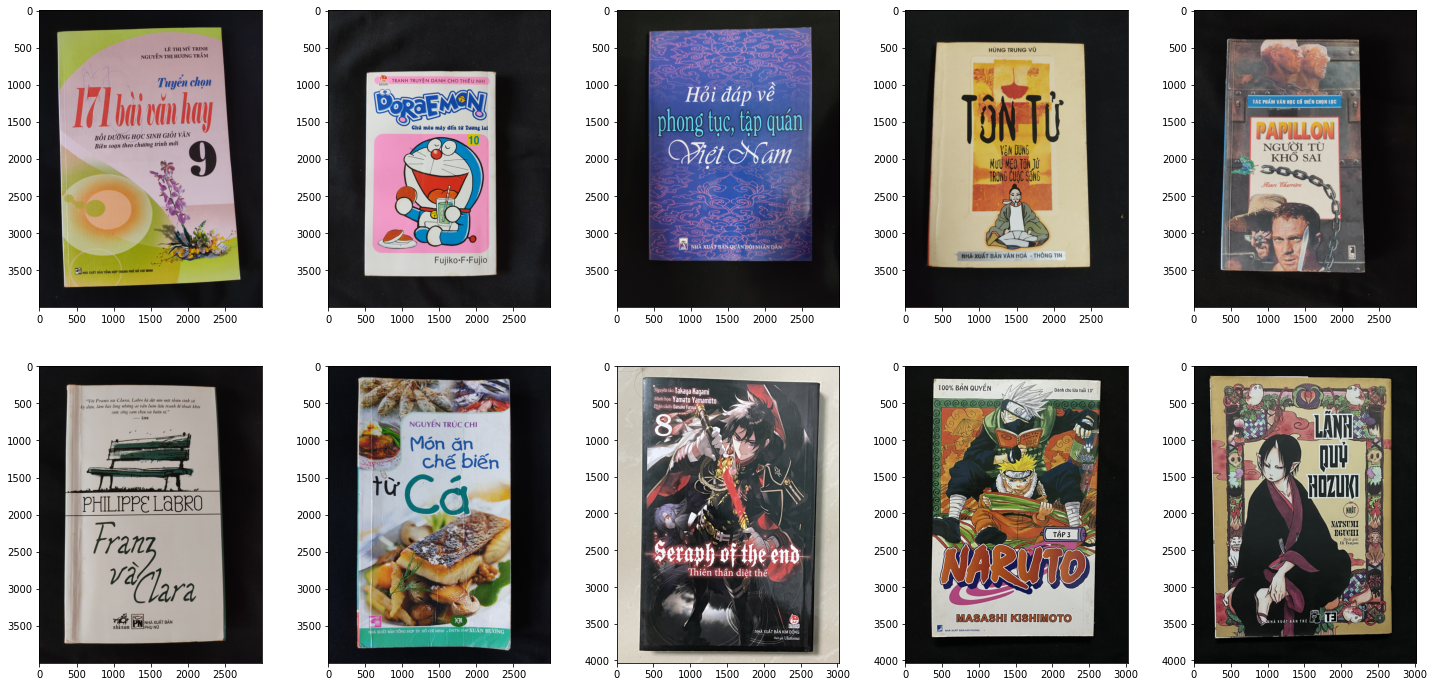

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import image
from scipy import ndimage

fig = plt.figure(figsize=(25, 12))
columns = 5
rows = 2
pathImage = "/content/bookcase-digitization/data_test"
FJoin = os.path.join
filenames = os.listdir(pathImage)
filenames.sort()
files = [FJoin(pathImage, f) for f in filenames]

ax = []

for i in range(columns*rows):
    img = image.imread(files[i])
    img = ndimage.rotate(img, -90)
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(img)
    
plt.show()

# Connect drive to load image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bookcase-digitization

In [ ]:
%cd /content/bookcase-digitization
# Cú pháp: !python main.py -i <thư mục chứa ảnh>
!python main.py -i /content/drive/MyDrive/data/book/hard

/content/bookcase-digitization
not scanner image  /content/drive/MyDrive/data/book/hard/1628332196463.jpg
not scanner image  /content/drive/MyDrive/data/book/hard/1628332196359.jpg
not scanner image  /content/drive/MyDrive/data/book/hard/1628332196356.jpg
not scanner image  /content/drive/MyDrive/data/book/hard/IMG_3594.JPG
YOLOv5 🚀 v5.0-358-g3e7c59a torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 606 layers, 141044212 parameters, 0 gradients, 221.3 GFLOPs
Adding AutoShape... 
Craft text refiner weight will be downloaded to /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
100% 1.85M/1.85M [00:00<00:00, 155MB/s]
Craft text detector weight will be downloaded to /root/.craft_text_detector/weights/craft_mlt_25k.pth
Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg

# Show result

In [ ]:
import pandas as pd

data_easy_pre = pd.read_csv('/content/bookcase-digitization/data.csv')
data_easy_pre.head(20)

,Unnamed: 0,file names,tên sách,tên tác giả,nhà xuất bản,tập,người dịch,tái bản
0,66,1624361242509.jpg,NGƯỜI HÀ NỘI,NaN,NHÀ XUẤT BẢN VĂN HÓA THÔNG TIN,NaN,NaN,NaN
1,70,1624361242539.jpg,VẬT L 12 TRẮC NGHIỆM,PHẠM ĐỨC CƯỜNG (Chủ biên) - LÊ THẾ NHI CỦI TRẦ...,NaN,NaN,(Trường THCS và THPT Nguyễn Khuyến,NaN
2,69,1624361242541.jpg,Tài liệu thực hành Màu ăn Cấp Trung học cơ sở,CAO THỊ TỦ ANH - NGUYỄN MINH KHANG,NHÀ XUẤT BẢN GIÁO DỤC VIỆT NAM,NaN,NaN,NaN
3,64,1624445642810.jpg,giải nhanh bài toán KĨ THUẬT hay & khó ĐẠI SỞ ...,NaN,NHÀ XUẤT BẢN HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
4,65,1624445642813.jpg,BỒI DƯỜNG HỌC SINH GIỖI HÓA HỌC OR,PGS.TS. CAO CỰ GIÁC,NaN,NaN,NaN,NaN
5,68,1624445642821.jpg,2 TỔNG HỢP CÁC BÀI TOÁN PHỔ DỤNG,TS. VŨ THẾ HỰU - NGUYỄN KHẮC AN NGUYỄN VĨNH CẬ...,NHÀ XUẤT BẢN ĐẠI HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
6,67,1624445642823.jpg,TỔNG HỢP CÁC BÀI TOÁN PHỔ DỤNG HÌNH HỌC 2,TS. VŨ THẾ HỰU - NGUYỄN'KHẮC AN NGUYỄN VĨNH CẬ...,NHÀ XUẤT BẢN ĐẠI HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
7,63,1624598848311.jpg,,Dương Kỳ Anh,Nhà xuất bản Hội Nhà văn-2004,NaN,NaN,NaN
8,61,1624598848332.jpg,DORAEMON Chú mèo máy đến từ Tương lai,Fujiko-F-Fujio,2 KIM ĐỒNG,2,NaN,NaN
9,62,1624598848335.jpg,0ORAEMONChúmèomáyđếntừTươnglai,Fujiko-F-Fujio,2 KIM ĐỒNG,,NaN,NaN


# Đánh giá

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd

Actual_easy = pd.read_csv('/content/hard.csv')
Actual_easy.head(20)

,Column1,file names,tên sách,tên tác giả,nhà xuất bản,tập,người dịch,tái bản
0,66,1624361242509.jpg,Thú ăn chơi NGƯỜI HÀ NỘI,BĂNG SƠN,NHÀ XUẤT BẢN VĂN HÓA THÔNG TIN,1,NaN,NaN
1,70,1624361242539.jpg,VẬT LÍ 12 TRẮC NGHIỆM,PHẠM ĐỨC CƯỜNG (Chủ biên) - LÊ THẾ NHIÊN BÙI T...,NHÀ XUẤT BẢN ĐẠI HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
2,69,1624361242541.jpg,Tài liệu thực hành nấu ăn Cấp Trung học cơ sở,CAO THỊ TỦ ANH - NGUYỄN MINH KHANG,NHÀ XUẤT BẢN GIÁO DỤC VIỆT NAM,NaN,NaN,NaN
3,64,1624445642810.jpg,KĨ THUẬT giải nhanh bài toán hay & khó ĐẠI SỐ ...,Ths. NGUYỄN DUY HIẾU,NHÀ XUẤT BẢN HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
4,65,1624445642813.jpg,BỒI DƯỜNG HỌC SINH GIỎI HÓA HỌC 9,PGS.TS. CAO CỰ GIÁC,NHÀ XUẤT BẢN HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
5,68,1624445642821.jpg,TỔNG HỢP CÁC BÀI TOÁN PHỔ DỤNG ĐẠI SỐ 9,TS. VŨ THẾ HỰU - NGUYỄN KHẮC AN NGUYỄN VĨNH CẬ...,NHÀ XUẤT BẢN ĐẠI HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
6,67,1624445642823.jpg,TỔNG HỢP CÁC BÀI TOÁN PHỔ DỤNG HÌNH HỌC 9,TS. VŨ THẾ HỰU - NGUYỄN KHẮC AN NGUYỄN VĨNH CẬ...,NHÀ XUẤT BẢN ĐẠI HỌC QUỐC GIA HÀ NỘI,NaN,NaN,NaN
7,63,1624598848311.jpg,Xuyên cẩm tiểu thuyết,Dương Kỳ Anh,Nhà xuất bản Hội Nhà văn-2004,NaN,NaN,NaN
8,61,1624598848332.jpg,DORAEMON Chú mèo máy đến từ Tương lai,Fujiko-F-Fujio,KIM ĐỒNG,2,NaN,NaN
9,62,1624598848335.jpg,DORAEMON Chú mèo máy đến từ Tương lai,Fujiko-F-Fujio,KIM ĐỒNG,7,NaN,NaN


In [ ]:
from fuzzywuzzy import fuzz
def evaluate_Based_On_Fuzz(str1, str2):
  Ratio = fuzz.ratio(str1,str2)
  if Ratio > 99:
    return 1
  else:
    return 0

In [ ]:
TP = 0
FP = 0
FN = 0
TN = 0
for feature in ['tên sách',	'tên tác giả',	'nhà xuất bản',	'tập',	'người dịch',	'tái bản']:
  for i in range(len(data_easy_pre)):
    checknull_pre = data_easy_pre[feature].isnull()
    checknull_actual = Actual_easy[feature].isnull()
    if checknull_actual[i]:
      if checknull_pre[i]:
        TN += 1
      else:
        FN += 1
    else:
      if checknull_pre[i]:
        FP += 1
      else:
        if evaluate_Based_On_Fuzz(data_easy_pre[feature][i], Actual_easy[feature][i]):
          TP += 1
        else:
          FP += 1
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = (2 * precision * recall) / (precision + recall)
f1

0.5513196480938417

In [ ]:
percent_90 = [0.8669354838709676, 0.7165021156558532, 0.6648648648648648]
percent_95 = [0.8364389233954451, 0.6868686868686869, 0.5885714285714286]
percent_100 = [0.7835497835497836, 0.6438152011922503, 0.5513196480938417]

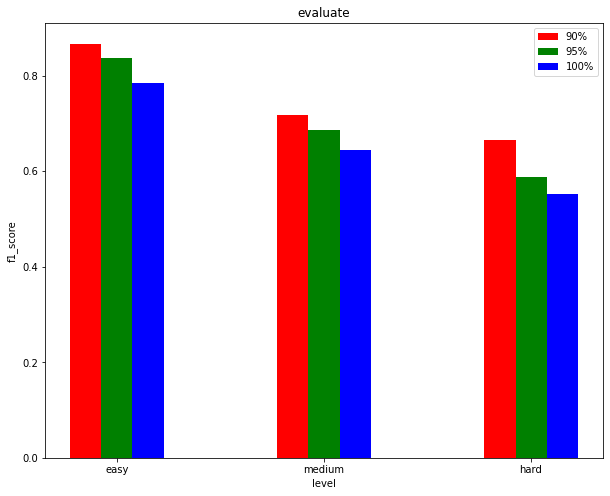

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N) 
width = 0.15
plt.figure(figsize=(10,8))
xvals = percent_90
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = percent_95
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = percent_100
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("level")
plt.ylabel('f1_score')
plt.title("evaluate")
  
plt.xticks(ind+width,['easy', 'medium', 'hard'])
plt.legend( (bar1, bar2, bar3), ('90%', '95%', '100%') )
plt.show()